In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from matrixprofile import *


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H:%M')
df = pd.read_csv('../datatraining.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:00,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
Occ=df['Occupancy'].copy()

In [4]:
#df.drop(['id', 'Temperature', 'Humidity', 'HumidityRatio', 'Occupancy'], axis=1, inplace =True)

In [5]:
df.loc[df['Light'] == 0, 'Light'] = 1

In [6]:
#df[df['Light']==0]

In [7]:
X = df['Light'].values
y = Occ

In [8]:
ts = df['Light']

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


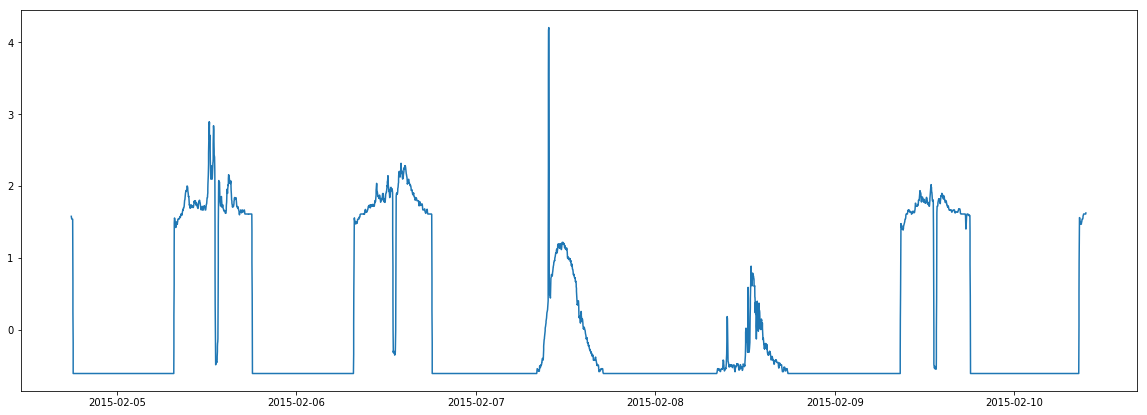

In [9]:
w = 5
plt.figure(figsize=(20,7))
plt.plot(((ts - ts.mean())/ts.std()).rolling(window=w).mean())
plt.show()

In [10]:
#ts=((ts - ts.mean())/ts.std()).rolling(window=w).mean()
#w=20
#ts = pd.Series(np.log(ts) - np.log(ts).rolling(w, center=False).mean(), index=ts.index)
#ts=ts.values[30:]

In [11]:
import math
from numpy import inf
ts=ts.values

/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/utils.py:177: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/utils.py:177: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/utils.py:177: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/utils.py:177: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))


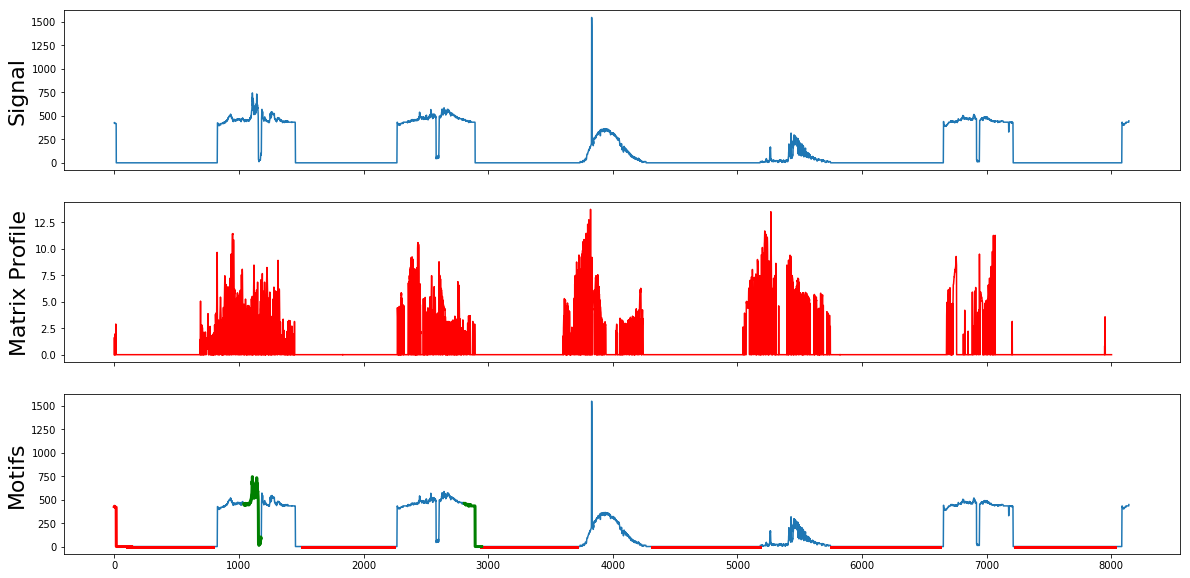

In [18]:

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(ts)), ts, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
w = 140
mp, mpi = matrixProfile.stamp(ts, w)
mp = [0 if math.isnan(x) else x for x in mp]
mp[mp == np.inf] = 0
ax2.plot(np.arange(len(mp)), mp, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)



#Plot the Motifs
mo, mod  = motifs.motifs(ts, (mp, mpi), max_motifs=5)
ax3.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        ax3.plot(range(i,i+w), m_shape, color=c, lw=3)
ax3.set_ylabel('Motifs', size=22)

plt.show()



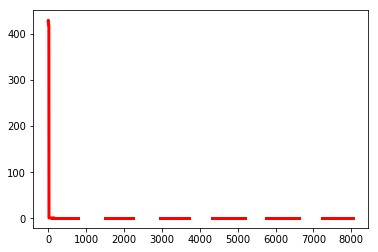

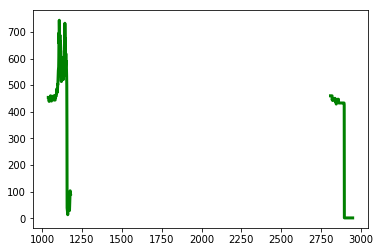

In [19]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [20]:
from matrixprofile.discords import discords

In [21]:
anoms = discords(mp, ex_zone=5, k=5)

In [22]:
anoms

array([3822, 5269, 3808, 3799, 5220])

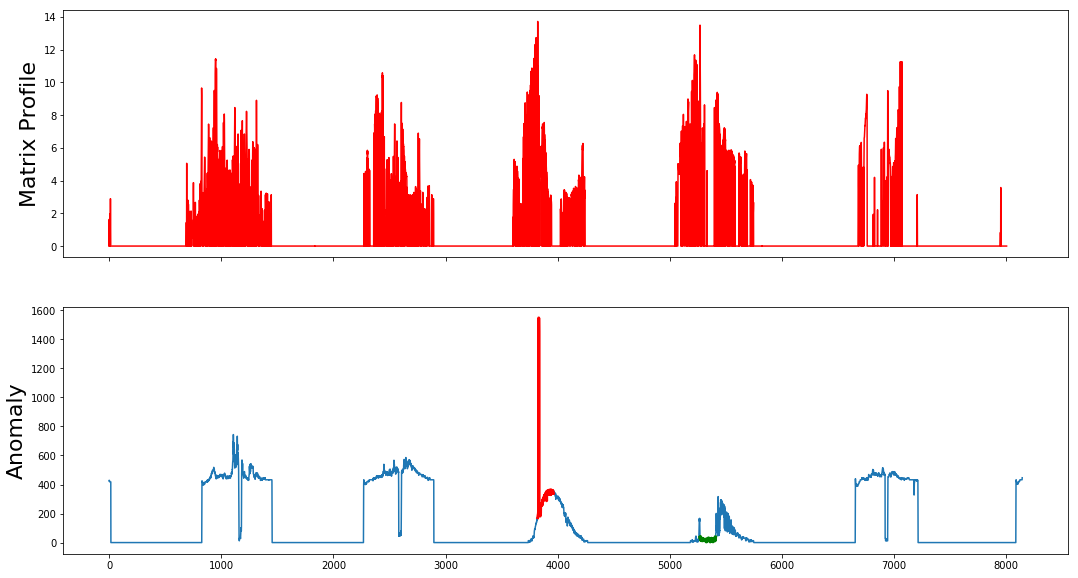

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(18,10))
ax1.plot(mp, label="Matrix Profile", color='red')
ax1.set_ylabel('Matrix Profile', size=22)
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    ax2.plot(range(a, a+w), a_shape, color=c, lw=3)
ax2.set_ylabel('Anomaly', size=22)

plt.show()

In [ ]:
#df['Occupancy'].plot(figsize=[20, 10], legend=True)
#df['Light'].apply(lambda x: x/450. + 2).plot(legend=True)
#df['CO2'].apply(lambda x: (x - 420.)/400. + 1).plot(legend=True)